In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'DRRX'

mysql = Mysql()

In [4]:
mysql.update_candles(ticker, 60)

,t,o,l,h,c,v,r
t,,,,,,,
0,2020-03-30 14:00:00,1.430,1.5400,1.4800,1.430,0.000000,47054
1,2020-03-30 15:00:00,1.465,1.5100,1.5100,1.480,-0.019481,105832
2,2020-03-30 16:00:00,1.480,1.5100,1.4950,1.510,0.000000,22647
3,2020-03-30 17:00:00,1.480,1.5100,1.4900,1.500,0.000000,49827
4,2020-03-30 18:00:00,1.465,1.5000,1.5000,1.485,-0.006623,35569
...,...,...,...,...,...,...,...
1,2021-03-29 16:00:00,1.890,1.9150,1.8900,1.915,-0.012887,15793
2,2021-03-29 17:00:00,1.895,1.9400,1.8950,1.930,0.013055,74382
3,2021-03-29 18:00:00,1.870,1.9000,1.8767,1.895,-0.020619,67895


In [5]:
data = mysql.get_closes_by_symbol(ticker)

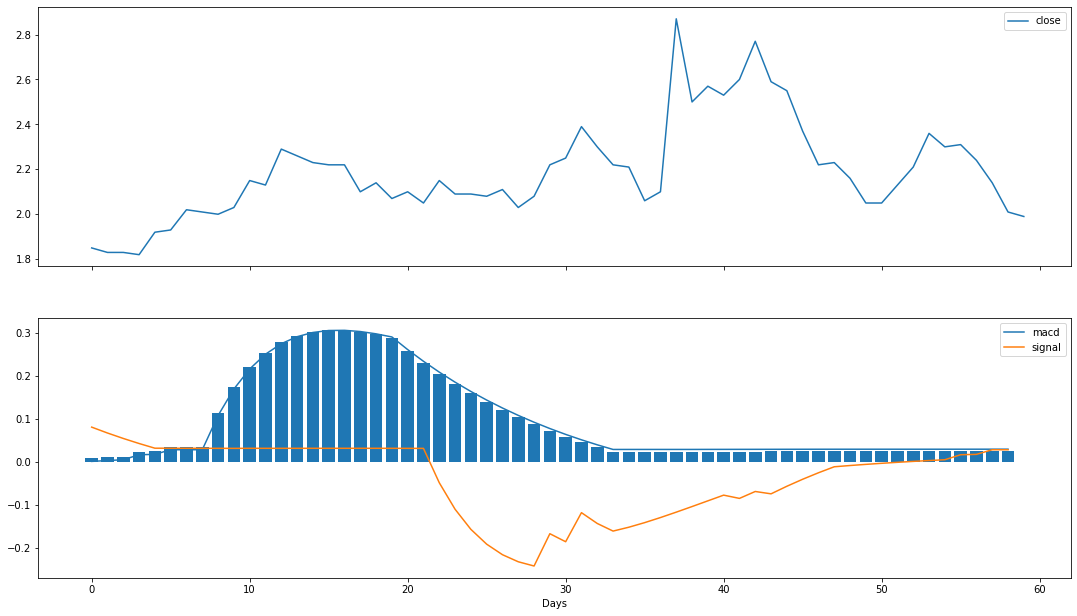

In [6]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

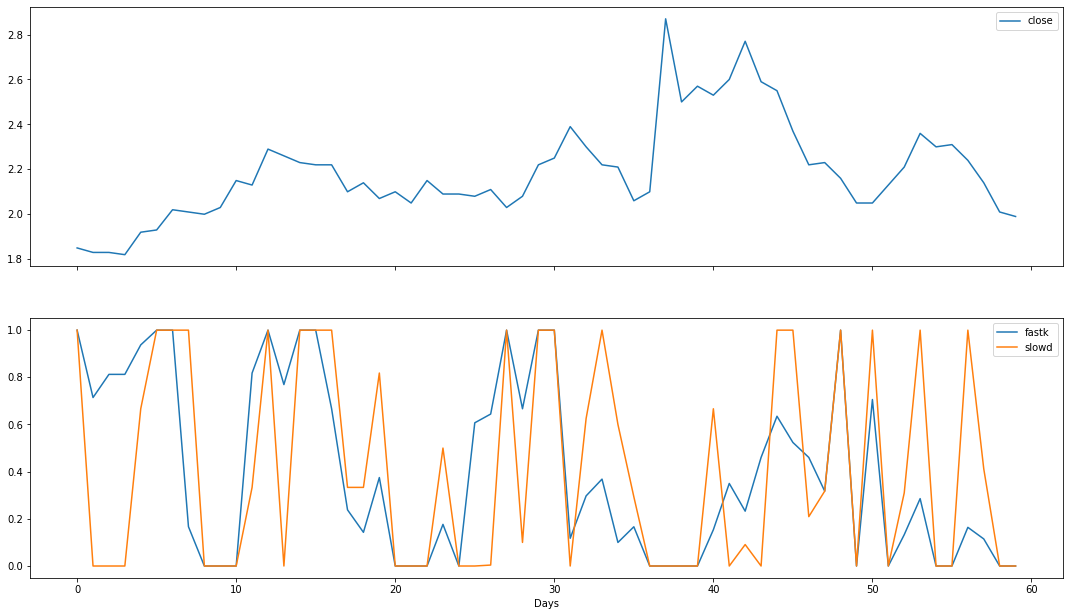

In [7]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)